In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter, defaultdict
from collections import OrderedDict as od
from pprint import pprint
from pymystem3 import Mystem
m = Mystem()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import word2vec
from natasha.extractors import NamesExtractor, LocationExtractor, AddressExtractor
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import jsonlines

In [2]:
def data(text, new_file):
    with open (text, encoding = 'utf-8') as f:
        big_text = f.read()
        tok = word_tokenize(big_text)
        for w in tok:
            p = morph.parse(w)[0]
            info = {'lemma' : p.normal_form, 'word': p.word, 'pos': p.tag.POS}
            with jsonlines.open(new_file, mode='a') as writer:
                writer.write(info)
    return new_file

In [3]:
def picture(data):
    my_data = []
    with jsonlines.open(data) as reader:
        for line in reader.iter():
            my_data.append(line)
    df = pd.DataFrame(my_data)
    df['pos'].value_counts().plot.bar(color='mediumslateblue');
    plt.title('Part of Speech')
    plt.xlabel('pos')
    plt.ylabel('number of entries');

In [4]:
#g = data('Glinka.txt', 'info_Glinka.jsonl')
#l = data('Lazhechnikov.txt', 'info_Lazhechnikov.jsonl')
#d = data('Durova.txt', 'info_Durova.jsonl')
#dav = data('Davydov.txt', 'info_Davydov.jsonl')
#sr = data('smirnova-rosset.txt', 'info_Smirnova.jsonl')

In [5]:
gg = 'info_Glinka.jsonl'
ll = 'info_Lazhechnikov.jsonl'
dd = 'info_Durova.jsonl'
ddav = 'info_Davydov.jsonl'
ssrr = 'info_Smirnova.jsonl'

In [6]:
def table(mdata):
    my_data = []
    with jsonlines.open(mdata) as reader:
        for line in reader.iter():
            if not line['pos'] == 'null' and not line['pos'] == None:
                my_data.append(line)
                #print(line)
    return my_data

In [7]:
g_df = table(gg)
gg_df = pd.DataFrame(g_df)
l_df = table(ll)
ll_df = pd.DataFrame(l_df)
d_df = table(dd)
dd_df = pd.DataFrame(d_df)
dav_df = table(ddav)
ddav_df = pd.DataFrame(dav_df)
sr_df = table(ssrr)
ssrr_df = pd.DataFrame(sr_df)

In [8]:
def new_pos(text):
    if text in ['ADJF', 'ADJS']:
        return 'ADJ'
    elif text in ["GRND", "PRTF", "PRTS", "INFN", "VERB"]:
        return "VERB"
    else:
        return text
gg_df["pos_two"] = gg_df["pos"].apply(new_pos)
ll_df["pos_two"] = ll_df["pos"].apply(new_pos)
dd_df["pos_two"] = dd_df["pos"].apply(new_pos)
ddav_df["pos_two"] = ddav_df["pos"].apply(new_pos)
ssrr_df["pos_two"] = ssrr_df["pos"].apply(new_pos)

In [9]:
def part_o_s(dataf):
    pos = dict(dataf['pos_two'].value_counts())
    total = sum(pos.values())
    for k, v in pos.items():
        pos[k] = (v/total)*100
    return pos


In [10]:
g_pos = part_o_s(gg_df)
l_pos = part_o_s(ll_df)
d_pos = part_o_s(dd_df)
dav_pos = part_o_s(ddav_df)
sr_pos = part_o_s(ssrr_df)

In [11]:
def sort(my_dict, keys, new_dict):
    for i in keys:
        new_dict[i] = my_dict[i]
    return new_dict

In [12]:
k = ['NOUN','VERB', 'ADJ','PREP','CONJ','NPRO','ADVB','PRCL','NUMR','COMP','PRED','INTJ']
new_d_g = {}
new_d_l = {}
new_d_dav = {}
new_d_d = {}
new_d_sr = {}
g_pos_sort = sort(g_pos, k, new_d_g)
l_pos_sort = sort(l_pos, k, new_d_l)
dav_pos_sort = sort(dav_pos, k, new_d_dav)
d_pos_sort = sort(d_pos, k, new_d_d)
sr_pos_sort = sort(sr_pos, k, new_d_sr)

In [13]:
def lemmas(df):
    p_lemmas = defaultdict(list)
    for i in df:
        if i['pos']  in ['ADJF', 'ADJS']:
            i['pos'] = 'ADJ'
        elif i['pos'] in ["GRND", "PRTF", "PRTS", "INFN", "VERB"]:
            i['pos'] = "VERB"
        p_lemmas[i['pos']].append(i['lemma'])
    return p_lemmas

In [14]:
g_lemmas_pos = lemmas(g_df)
l_lemmas_pos = lemmas(l_df)
d_lemmas_pos = lemmas(d_df)
dav_lemmas_pos = lemmas(dav_df)
sr_lemmas_pos = lemmas(sr_df)

In [15]:
def count_all(data, p):
    a = 0
    for pos in p:
        print(pos, len(data[pos]))
        a += len(data[pos])
    print(a)

In [16]:
def count_my_pos (my_list, pos, most):
    tot = len(my_list[pos])
    c = Counter(my_list[pos]).most_common(most)
    print('word', 'abs', 'percent')
    for cc in c:
        p = (cc[1]/tot)*100
        print(cc[0], cc[1], p)

In [17]:
d_lemmas_pos = lemmas(d_df)
count_my_pos (d_lemmas_pos, 'NPRO', 10)

word abs percent
я 4585 42.38306526160103
он 1773 16.38935108153078
она 883 8.16232205583287
мы 709 6.55389166204474
они 624 5.7681641708264
вы 529 4.889998151229433
это 456 4.215196894065446
ты 362 3.346274727306341
себя 268 2.477352560547236
ничто 136 1.2571639859493438


In [18]:
g_lemmas_pos = lemmas(g_df)
count_my_pos (g_lemmas_pos, 'NPRO', 10)

word abs percent
он 1113 25.135501355013552
они 738 16.666666666666664
мы 676 15.266485998193316
я 473 10.682023486901535
она 418 9.43992773261066
себя 225 5.08130081300813
вы 151 3.4101174345076783
ты 144 3.2520325203252036
это 106 2.3938572719060525
кто 84 1.8970189701897018


In [19]:
l_lemmas_pos = lemmas(l_df)
count_my_pos (l_lemmas_pos, 'NPRO', 10)

word abs percent
он 900 32.07412687099073
они 460 16.39344262295082
я 366 13.043478260869565
она 310 11.047754811119031
мы 254 9.052031361368496
вы 143 5.096222380612972
себя 113 4.027084818246615
это 103 3.6707056307911614
кто 41 1.4611546685673558
ты 24 0.8553100498930863


In [20]:
dav_lemmas_pos = lemmas(dav_df)
count_my_pos (dav_lemmas_pos, 'NPRO', 10)

word abs percent
я 810 34.571062740076826
он 699 29.833546734955185
мы 255 10.88348271446863
они 205 8.74946649594537
она 79 3.371745625266752
себя 67 2.8595817328211695
вы 55 2.3474178403755865
это 47 2.0059752454118653
ты 36 1.5364916773367476
что 23 0.9816474605207


In [21]:
def words(lemmas_pos, slova, pos):
    len_l = len(lemmas_pos[pos])
    c = Counter(lemmas_pos[pos]).most_common()
    diction = od({})
    for s in slova:
        diction[s] = ''
    for cc in c:
        if cc[0] in slova:
            v =((cc[1]/len_l)*100)
            diction[cc[0]] = v
    return diction

In [22]:
slova = ['я', 'ты', 'он', 'она', 'оно', 'мы', 'вы', 'они']
print('Glinka')
npro_g = words(g_lemmas_pos, slova, 'NPRO')
pprint(npro_g)
print('Lazhechnikov')
npro_l = words(l_lemmas_pos, slova, 'NPRO')
pprint(npro_l)
print('Davydov')
npro_dav = words(dav_lemmas_pos, slova, 'NPRO')
pprint(npro_dav)
print('Durova')
npro_d = words(d_lemmas_pos, slova, 'NPRO')
pprint(npro_d)
print('Smirnova-Rosset')
npro_sr = words(sr_lemmas_pos, slova, 'NPRO')
pprint(npro_sr)

Glinka
OrderedDict([('я', 10.682023486901535),
             ('ты', 3.2520325203252036),
             ('он', 25.135501355013552),
             ('она', 9.43992773261066),
             ('оно', 1.038843721770551),
             ('мы', 15.266485998193316),
             ('вы', 3.4101174345076783),
             ('они', 16.666666666666664)])
Lazhechnikov
OrderedDict([('я', 13.043478260869565),
             ('ты', 0.8553100498930863),
             ('он', 32.07412687099073),
             ('она', 11.047754811119031),
             ('оно', 0.6058446186742694),
             ('мы', 9.052031361368496),
             ('вы', 5.096222380612972),
             ('они', 16.39344262295082)])
Davydov
OrderedDict([('я', 34.571062740076826),
             ('ты', 1.5364916773367476),
             ('он', 29.833546734955185),
             ('она', 3.371745625266752),
             ('оно', 0.3841229193341869),
             ('мы', 10.88348271446863),
             ('вы', 2.3474178403755865),
             ('они', 8.74946649

In [23]:
slova = ['ах', 'ура', 'увы']
print('Glinka')
intj_g = words(g_lemmas_pos, slova, 'INTJ')
pprint(intj_g)
print('Lazhechnikov')
intj_l = words(l_lemmas_pos, slova, 'INTJ')
pprint(intj_l)
print('Davydov')
intj_dav = words(dav_lemmas_pos, slova, 'INTJ')
pprint(intj_dav)
print('Durova')
intj_d = words(d_lemmas_pos, slova, 'INTJ')
pprint(intj_d)
print('Smirnova-Rosser')
intj_sr = words(sr_lemmas_pos, slova, 'INTJ')
pprint(intj_sr)

Glinka
OrderedDict([('ах', 3.79746835443038),
             ('ура', 10.126582278481013),
             ('увы', 2.5316455696202533)])
Lazhechnikov
OrderedDict([('ах', 2.127659574468085),
             ('ура', 19.148936170212767),
             ('увы', 3.1914893617021276)])
Davydov
OrderedDict([('ах', 2.7777777777777777),
             ('ура', 19.444444444444446),
             ('увы', 8.333333333333332)])
Durova
OrderedDict([('ах', 29.545454545454547),
             ('ура', 1.8181818181818181),
             ('увы', 5.909090909090909)])
Smirnova-Rosser
OrderedDict([('ах', ''), ('ура', ''), ('увы', '')])


([<matplotlib.axis.XTick at 0x29ea8100>,
 [Text(3, 0, 'я'),
  Text(9, 0, 'ты'),
  Text(15, 0, 'он'),
  Text(21, 0, 'она'),
  Text(27, 0, 'оно'),
  Text(33, 0, 'мы'),
  Text(39, 0, 'вы'),
  Text(45, 0, 'они')])

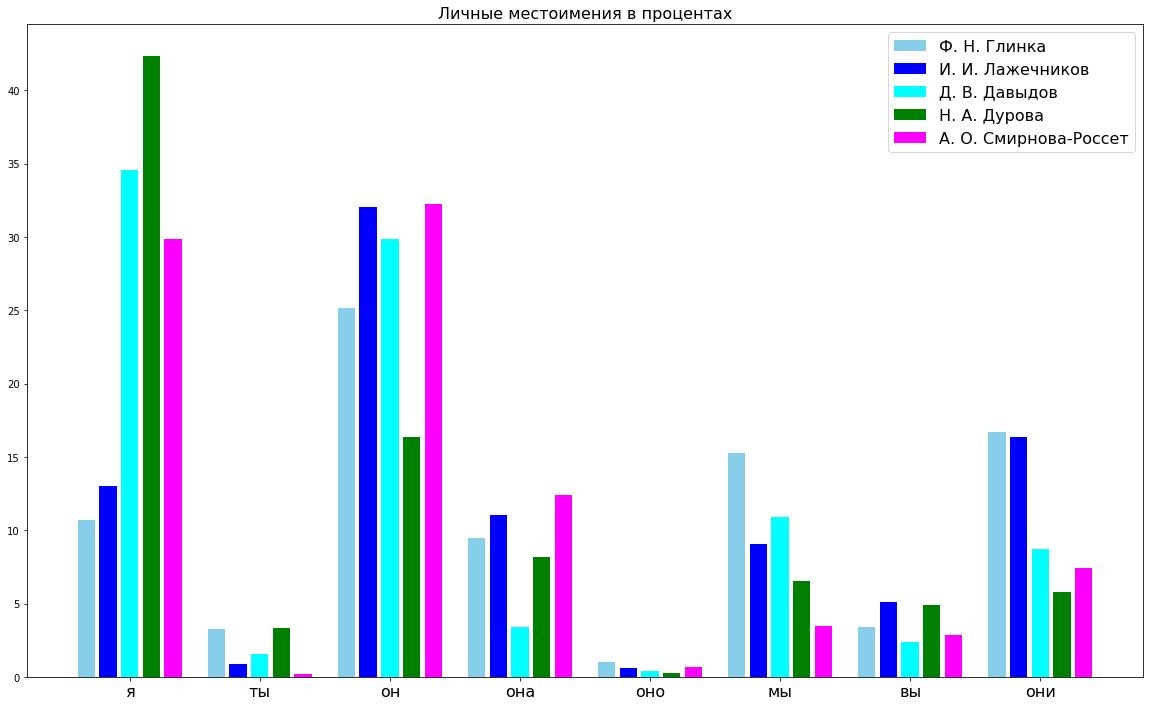

In [24]:
barWidth = 10
y_pos = [1, 7, 13, 19, 25, 31, 37, 43]
y_pos_one = [y + 1 for y in y_pos]
y_pos_two = [y + 1 for y in y_pos_one]
y_pos_three = [y + 1 for y in y_pos_two]
y_pos_four = [y + 1 for y in y_pos_three]
plt.figure(figsize=(20,12))
plt.bar(y_pos, npro_g.values(), color='skyblue', label = 'Ф. Н. Глинка')
plt.bar(y_pos_one, npro_l.values(), color='blue', label = 'И. И. Лажечников')
plt.bar(y_pos_two, npro_dav.values(), color='cyan', label = 'Д. В. Давыдов')
plt.bar(y_pos_three, npro_d.values(), color='green', label = 'Н. А. Дурова')
plt.bar(y_pos_four, npro_sr.values(), color='magenta', label = 'А. О. Смирнова-Россет')
plt.title('Личные местоимения в процентах', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(y_pos_two, list(npro_d.keys()), fontsize = 16)

([<matplotlib.axis.XTick at 0x2cb24340>,
 [Text(2, 0, 'ах'), Text(7, 0, 'ура'), Text(12, 0, 'увы')])

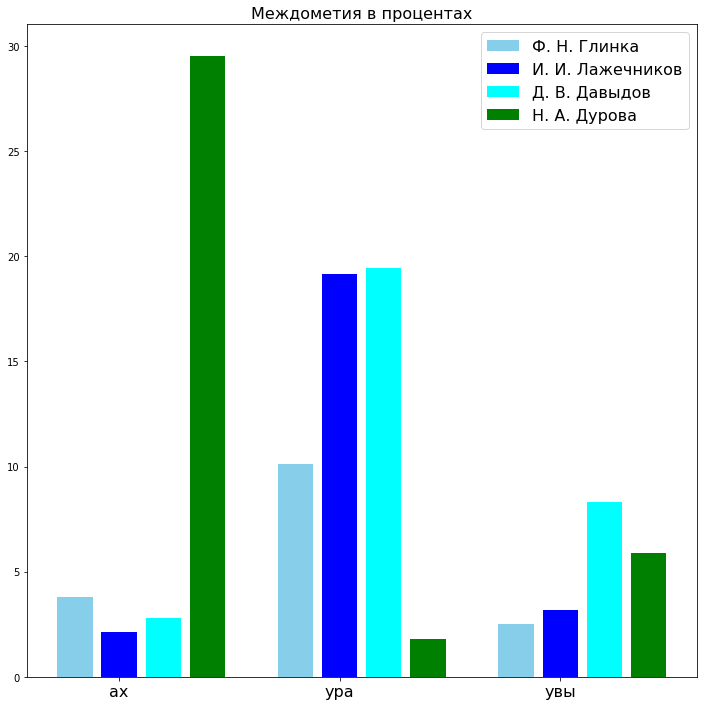

In [25]:
barWidth = 10
y_pos = [1, 6, 11]
y_pos_one = [y + 1 for y in y_pos]
y_pos_two = [y + 1 for y in y_pos_one]
y_pos_three = [y + 1 for y in y_pos_two]
y_pos_four = [y + 1 for y in y_pos_three]
plt.figure(figsize=(12,12))
plt.bar(y_pos, intj_g.values(), color='skyblue', label = 'Ф. Н. Глинка')
plt.bar(y_pos_one, intj_l.values(), color='blue', label = 'И. И. Лажечников')
plt.bar(y_pos_two, intj_dav.values(), color='cyan', label = 'Д. В. Давыдов')
plt.bar(y_pos_three, intj_d.values(), color='green', label = 'Н. А. Дурова')
#plt.bar(y_pos_four, intj_d.values(), color='magenta', label = 'Н. А. Дурова')
plt.title('Междометия в процентах', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(y_pos_one, list(intj_d.keys()), fontsize = 16)

In [26]:
men = {}
for k in g_pos_sort.keys():
    men[k] = g_pos_sort[k]+l_pos_sort[k]+dav_pos_sort[k]
men_total = sum(men.values())
men_pos = {}
for k, v in men.items():
    men_pos[k] = (v/men_total)*100

In [27]:
all_w = {}
for k in g_pos_sort.keys():
    all_w[k] = g_pos_sort[k]+l_pos_sort[k]+dav_pos_sort[k]+d_pos_sort[k]
all_total = sum(all_w.values())
all_pos = {}
for k, v in all_w.items():
    all_pos[k] = (v/all_total)*100

([<matplotlib.axis.XTick at 0x2c02a970>,
 [Text(3, 0, 'NOUN'),
  Text(9, 0, 'VERB'),
  Text(15, 0, 'ADJ'),
  Text(21, 0, 'PREP'),
  Text(27, 0, 'CONJ'),
  Text(33, 0, 'NPRO'),
  Text(39, 0, 'ADVB'),
  Text(45, 0, 'PRCL'),
  Text(51, 0, 'NUMR'),
  Text(57, 0, 'COMP'),
  Text(63, 0, 'PRED'),
  Text(69, 0, 'INTJ')])

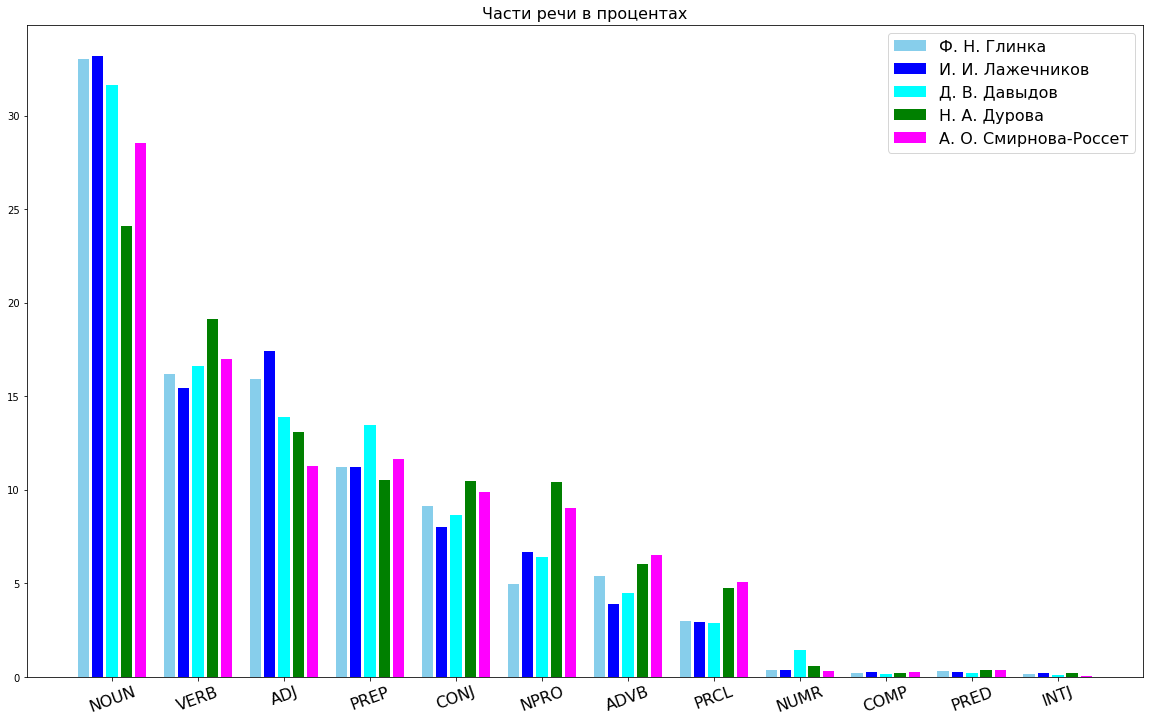

In [28]:
barWidth = 10
y_pos = [1, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67]
y_pos_one = [y + 1 for y in y_pos]
y_pos_two = [y + 1 for y in y_pos_one]
y_pos_three = [y + 1 for y in y_pos_two]
y_pos_four = [y + 1 for y in y_pos_three]
plt.figure(figsize=(20,12))
plt.bar(y_pos, g_pos_sort.values(), color='skyblue', label = 'Ф. Н. Глинка')
plt.bar(y_pos_one, l_pos_sort.values(), color='blue', label = 'И. И. Лажечников')
plt.bar(y_pos_two, dav_pos_sort.values(), color='cyan', label = 'Д. В. Давыдов')
plt.bar(y_pos_three, d_pos_sort.values(), color='green', label = 'Н. А. Дурова')
plt.bar(y_pos_four, sr_pos_sort.values(), color='magenta', label = 'А. О. Смирнова-Россет')
plt.title('Части речи в процентах', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(y_pos_two, l_pos_sort.keys(), rotation=20, fontsize = 16)

([<matplotlib.axis.XTick at 0x2c34b580>,
 [Text(0, 0, 'NOUN'),
  Text(50, 0, 'VERB'),
  Text(100, 0, 'ADJ'),
  Text(150, 0, 'PREP'),
  Text(200, 0, 'CONJ'),
  Text(250, 0, 'NPRO'),
  Text(300, 0, 'ADVB'),
  Text(350, 0, 'PRCL'),
  Text(400, 0, 'NUMR'),
  Text(450, 0, 'COMP'),
  Text(500, 0, 'PRED'),
  Text(550, 0, 'INTJ')])

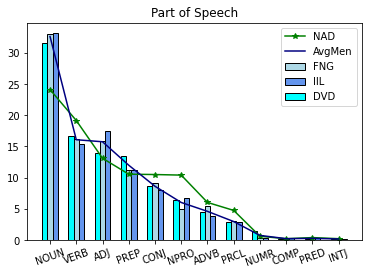

In [29]:
barWidth = 10
y_pos = np.arange(12)
y_pos_one = [x * barWidth * 5 for x in y_pos]
y_pos_two = [x + barWidth for x in y_pos_one]
y_pos_three = [x - barWidth for x in y_pos_one]
plt.bar(y_pos_one, g_pos_sort.values(), width = barWidth, color='lightblue', edgecolor = 'black', label = 'FNG')
plt.bar(y_pos_two, l_pos_sort.values(), width = barWidth, color='cornflowerblue', edgecolor = 'black', label = 'IIL')
plt.bar(y_pos_three, dav_pos_sort.values(), width = barWidth, color='cyan', edgecolor = 'black', label = 'DVD')
plt.plot(y_pos_one, d_pos_sort.values(), color='green', marker = '*', label = 'NAD')
plt.plot(y_pos_one, men_pos.values(), color='navy', label = 'AvgMen')
plt.title('Part of Speech')
plt.legend()
plt.xticks(y_pos_one, l_pos_sort.keys(), rotation=20)

([<matplotlib.axis.XTick at 0x2c4363d0>,
 [Text(0, 0, 'NOUN'),
  Text(1, 0, 'VERB'),
  Text(2, 0, 'ADJ'),
  Text(3, 0, 'PREP'),
  Text(4, 0, 'CONJ'),
  Text(5, 0, 'NPRO'),
  Text(6, 0, 'ADVB'),
  Text(7, 0, 'PRCL'),
  Text(8, 0, 'NUMR'),
  Text(9, 0, 'COMP'),
  Text(10, 0, 'PRED'),
  Text(11, 0, 'INTJ')])

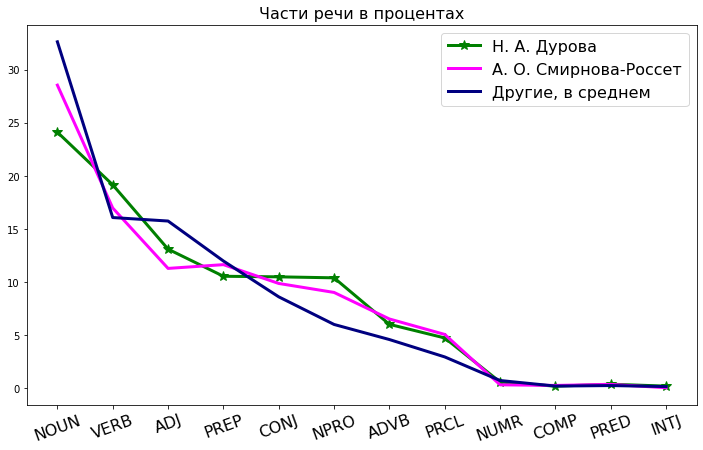

In [30]:
plt.figure(figsize=(12,7))
plt.plot(d_pos_sort.values(), color='green', marker = '*', markersize = 10, label = 'Н. А. Дурова', linewidth = 3)
plt.plot(sr_pos_sort.values(), color='magenta', label = 'А. О. Смирнова-Россет', linewidth = 3,)
plt.plot(men_pos.values(), color='navy', label = 'Другие, в среднем', linewidth = 3,)
plt.title('Части речи в процентах', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(np.arange(12), l_pos_sort.keys(), rotation=20, fontsize = 16)

([<matplotlib.axis.XTick at 0x29e82dc0>,
 [Text(0, 0, 'NOUN'),
  Text(1, 0, 'VERB'),
  Text(2, 0, 'ADJ'),
  Text(3, 0, 'PREP'),
  Text(4, 0, 'CONJ'),
  Text(5, 0, 'NPRO'),
  Text(6, 0, 'ADVB'),
  Text(7, 0, 'PRCL'),
  Text(8, 0, 'NUMR'),
  Text(9, 0, 'COMP'),
  Text(10, 0, 'PRED'),
  Text(11, 0, 'INTJ')])

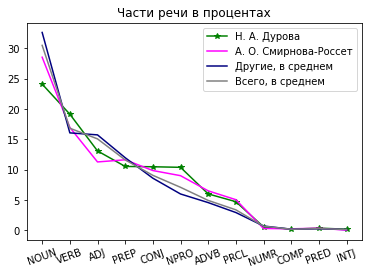

In [31]:
plt.plot(d_pos_sort.values(), color='green', marker = '*', label = 'Н. А. Дурова')
plt.plot(sr_pos_sort.values(), color='magenta', label = 'А. О. Смирнова-Россет')
plt.plot(men_pos.values(), color='navy', label = 'Другие, в среднем')
plt.plot(all_pos.values(), color='gray', label = 'Всего, в среднем')
plt.title('Части речи в процентах')
plt.legend()
plt.xticks(np.arange(12), l_pos_sort.keys(), rotation=20)

In [32]:
def read_clean(file, new_file):
    with open (file, encoding = 'utf-8') as f:
        my_text = f.readlines()
    for line in my_text:
        l = m.lemmatize(line)
        words = [w.lower() for w in l if w.isalpha()]
        line = ' '.join(words)
        with open (new_file, encoding = 'utf-8', mode = 'a') as n_f:
            n_f.write(line+'\n')
    return new_file

In [33]:
#t_g = read_clean('Glinka.txt', 'lemmas_Glinka.txt')
#print('Done!')
#t_l = read_clean('Lazhechnikov.txt', 'lemmas_Lazhechnikov.txt')
#print('Done!')
#t_dav = read_clean('Davydov.txt', 'lemmas_Davydov.txt')
#print('Done!')
#t_d = read_clean('Durova.txt', 'lemmas_Durova.txt')
#print('Done!')
#t_sr = read_clean('smirnova-rosset.txt', 'lemmas_Smirnova_Rosset.txt')

In [34]:
t_g = 'lemmas_Glinka.txt'
t_l = 'lemmas_Lazhechnikov.txt'
t_dav = 'lemmas_Davydov.txt'
t_d = 'lemmas_Durova.txt'

In [35]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(80, 100)

def cloud(df, my_title, bg, color):
#def cloud(df, my_title, bg):
    bad = ["этот", "весь", "свой", "это", "который"]
    stops = set(stopwords.words('russian'))
    text = ' '.join([word for word in df['lemma'].values if word not in stops and word not in bad])
    wordcloud = WordCloud(
        background_color =bg,
        colormap = color,
        width = 1500,
        height = 1500, 
    ).generate(text)
    plt.figure(figsize = (10, 10), facecolor = None) 
    #plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           #interpolation="bilinear")
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.title(my_title)
    plt.show()

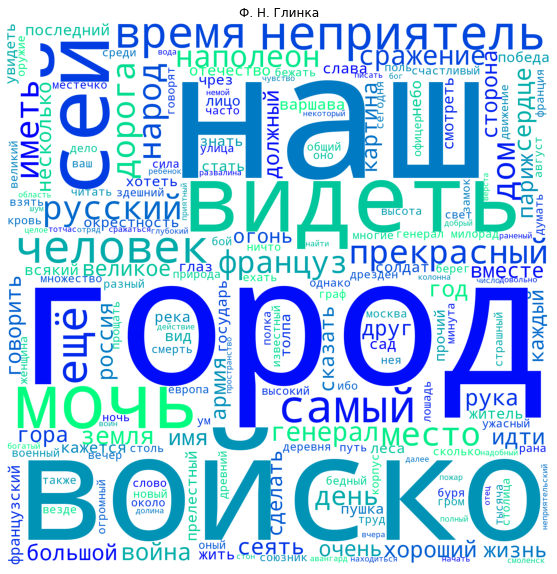

In [36]:
cloud(gg_df,'Ф. Н. Глинка', 'white', 'winter')

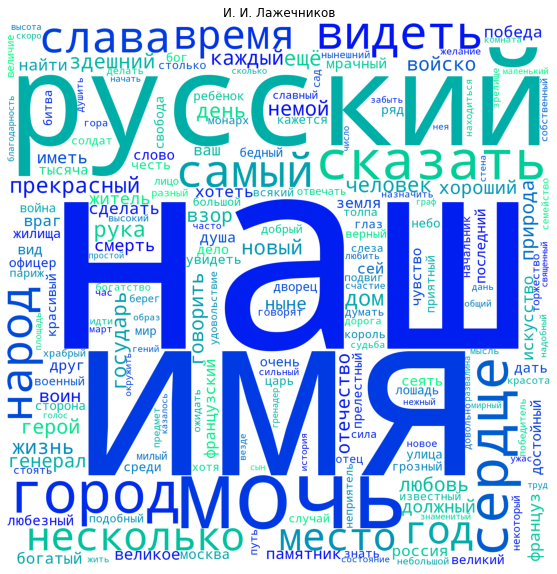

In [37]:
cloud(ll_df, 'И. И. Лажечников','white', 'winter')

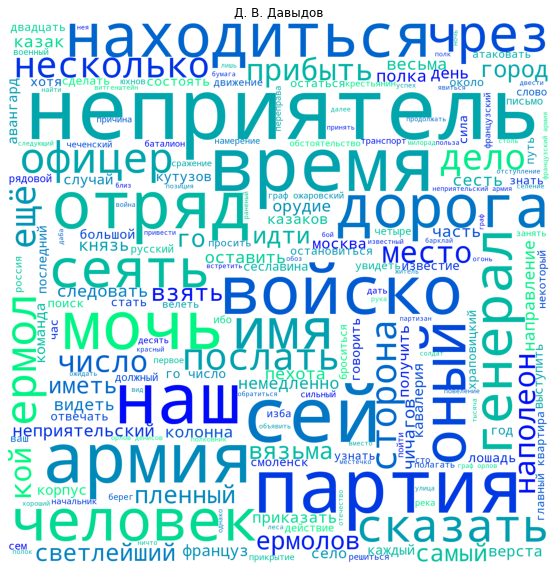

In [38]:
cloud(ddav_df,'Д. В. Давыдов' , 'white', 'winter')

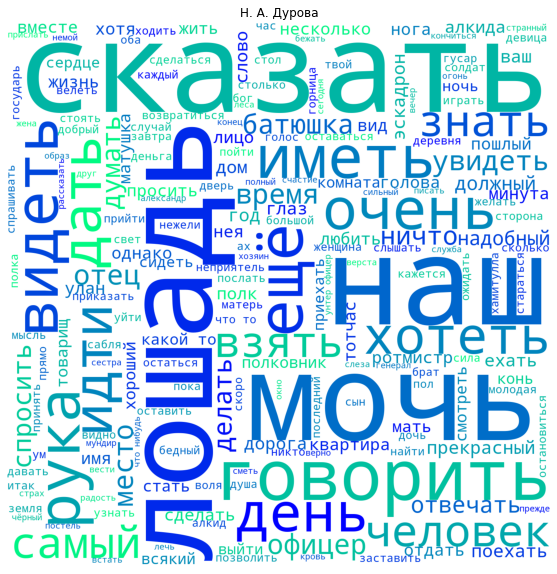

In [39]:
cloud(dd_df, 'Н. А. Дурова', 'white', 'winter')

Можно ещё покраисть фон в какой-нибудь цвет, а слова выделить серым (но это не важно, только для красоты):
<img src = 'https://raw.githubusercontent.com/YanaKoko/1812/main/облако.JPG'>

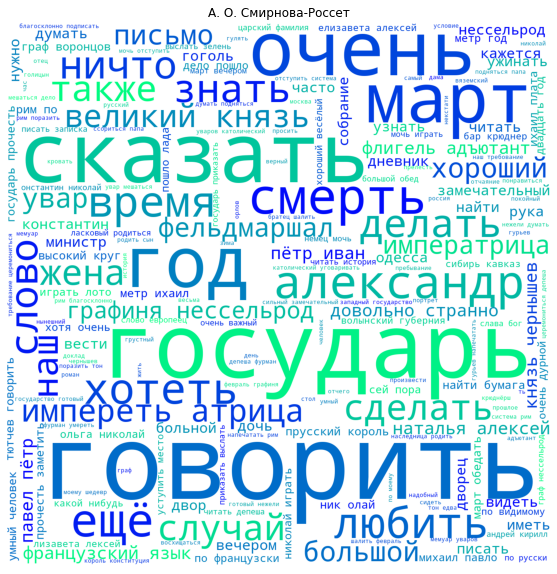

In [40]:
cloud(ssrr_df, 'А. О. Смирнова-Россет', 'white', 'winter')

Тут я пыталась искать синонимы и прочие семантические штуки, но вышло плохо.

In [41]:
#data = gensim.models.word2vec.LineSentence(t_g)
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#g_model = gensim.models.Word2Vec(data, size=300, window=10, min_count=5, iter = 6)

In [42]:
#data = gensim.models.word2vec.LineSentence(t_l)
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#l_model = gensim.models.Word2Vec(data, size=300, window=10, min_count=5, iter = 6)

In [43]:
#data = gensim.models.word2vec.LineSentence(t_dav)
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#dav_model = gensim.models.Word2Vec(data, size=300, window=10, min_count=5, iter = 6)

In [44]:
#data = gensim.models.word2vec.LineSentence(t_d)
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#d_model = gensim.models.Word2Vec(data, size=300, window=10, min_count=5, iter = 6)

In [45]:
#g_model.wv.most_similar("не", topn=15)

In [46]:
#l_model.wv.most_similar("не", topn=15)

In [47]:
#dav_model.wv.most_similar("не", topn=15)

In [48]:
#d_model.wv.most_similar("не", topn=15)

In [49]:
#g_model.wv.most_similar(positive=["ты", "я"], negative=["мы"], topn=3)

In [50]:
#l_model.wv.most_similar(positive=["ты", "я"], negative=["мы"], topn=3)

In [51]:
#dav_model.wv.most_similar(positive=["ты", "я"], negative=["мы"], topn=3)

In [52]:
#d_model.wv.most_similar(positive=["мой", "твой"], negative=["я"], topn=3)

In [53]:
def names(text):
    my_names = []
    ne = NamesExtractor()
    le = LocationExtractor()
    res = ne(text)
    for i in range(len(res)):
        if i % 2 == 0:
            value = f'{res[i].fact.first or ""} {res[i].fact.middle or ""} {res[i].fact.last or ""}'.strip()
            my_names.append(value)
    res_two = le(text)
    for i in range(len(res_two)):
        if i % 2 == 0:
            value = res_two[i].fact.name
            my_names.append(value)
    return(my_names)


def people(text):
    my_names = []
    ne = NamesExtractor()
    res = ne(text)
    for i in range(len(res)):
        if i % 2 == 0:
            value = f'{res[i].fact.first or ""} {res[i].fact.middle or ""} {res[i].fact.last or ""}'.strip()
            my_names.append(value)
    return(my_names)


def places(text):
    my_names = []
    le = LocationExtractor()
    res_two = le(text)
    for i in range(len(res_two)):
        if i % 2 == 0:
            value = res_two[i].fact.name
            my_names.append(value)
    return(my_names)

In [54]:
def text(file):
    with open (file, encoding = 'utf-8') as f:
        text = f.read()
    return text

In [55]:
g_text = text('Glinka.txt')
l_text = text('Lazhechnikov.txt')
dav_text = text('Davydov.txt')
d_text = text('Durova.txt')
sr_text = text('smirnova-rosset.txt')

In [56]:
g_names = names(g_text)
g_people = people(g_text)
g_places = places(g_text)

In [57]:
l_names = names(l_text)
l_people = people(l_text)
l_places = places(l_text)

In [58]:
dav_names = names(dav_text)
dav_people = people(dav_text)
dav_places = places(dav_text)

In [59]:
d_names = names(d_text)
d_people = people(d_text)
d_places = places(d_text)

In [60]:
sr_names = names(sr_text)
sr_people = people(sr_text)
sr_places = places(sr_text)

In [61]:
print('Glinka')
pprint(Counter(g_names).most_common(20))
print('Lazhechnikov')
pprint(Counter(l_names).most_common(20))
print('Davydov')
pprint(Counter(dav_names).most_common(20))
print('Durova')
pprint(Counter(d_names).most_common(20))
print('Smirnova-Rosset')
pprint(Counter(sr_names).most_common(20))

Glinka
[('великое', 58),
 ('париж', 54),
 ('россия', 46),
 ('варшава', 46),
 ('то', 36),
 ('франция', 29),
 ('европа', 29),
 ('дрезден', 28),
 ('москва', 27),
 ('нея', 23),
 ('сим', 19),
 ('май', 16),
 ('висла', 15),
 ('польша', 14),
 ('саксония', 14),
 ('блюхер', 13),
 ('смоленск', 13),
 ('марна', 13),
 ('эльба', 12),
 ('рейн', 12)]
Lazhechnikov
[('великое', 25),
 ('то', 25),
 ('москва', 18),
 ('россия', 16),
 ('нея', 13),
 ('франция', 12),
 ('париж', 11),
 ('александр', 9),
 ('польша', 9),
 ('европа', 8),
 ('который', 8),
 ('грозный', 7),
 ('германия', 7),
 ('берлин', 7),
 ('монмартр', 6),
 ('мирный', 6),
 ('фредерик', 5),
 ('траяна', 5),
 ('густав', 5),
 ('вартбург', 5)]
Davydov
[('чичагов', 28),
 ('ермол', 27),
 ('вязьма', 27),
 ('кутузов', 26),
 ('ермолов', 25),
 ('сеславина', 20),
 ('смоленск', 18),
 ('березина', 18),
 ('витгенштейн', 17),
 ('то', 16),
 ('нея', 14),
 ('фигнер', 13),
 ('денисов', 13),
 ('москва', 13),
 ('россия', 12),
 ('коновницын', 10),
 ('дохтуров', 10),
 ('юхн

In [62]:
def percent(my_list):
    i = 0
    start = 300
    new = {}
    l = len(my_list)
    count = Counter(my_list).most_common()
    for c in range(len(count)):
        if count[c][1] < start:
            i += 1
            start = count[c][1]
        new[count[c][0]] = [{'perc': (count[c][1]/l)*100, 'abs': count[c][1], 'count': i}]
        #if i += 1
        #print(i)
    return new

In [63]:
#percent(g_people)

In [64]:
#percent(l_people)

In [65]:
#percent(dav_people)

In [66]:
#percent(d_people)

In [67]:
d_clean = [p for p in d_people if p != 'алкида']
#percent(d_clean)